<div style="text-align: right"> 13.12.2019</div>

***Name:*** Kaja Brink

# Hausaufgabe Blatt 8

## Rollen: Schiefe Ebene 

Wir betrachten einen Zylinder mit Radius $R$, Masse $m$ und Kreismittelpunkt $M$. Wir wollen die Bewegung des Zylinders entlang einer schiefen Ebene berechnen und visualisieren. Die schiefe Ebene hat einen Neigungswinkel $\theta = 12^{\circ}$. Der Startpunkt des Zylinders befinde sich $h_0=1$ über dem Boden.


<img src="./rollingPlane.png" alt="rollingPlane" width="300"/>

Die Höhe $h$ nach der auf der Ebene zurückgelegten Strecke $l$ beträgt
$$
h = h_0 - l \sin \theta
$$

und somit gilt für die potentielle Energie:
$$
E_{\mathrm{pot}} = m g (h_0 - l \sin \theta).
$$

Die kinetische Energie setzt sich zusammen aus der Translationsenergie $E_\mathrm{trans}=\frac{1}{2}mv^2 = \frac{1}{2}m\omega^2 R^2$ und der Rotationsenergie um die Hauptrotationsachse $E_\mathrm{rot}=\frac{1}{2}I\omega^2$, wobei $I$ das Trägheitsmoment des Zylinders bezüglich seiner Hauptrotationsachse ist
$$
E_\mathrm{kin}= E_\mathrm{trans} + E_\mathrm{rot} = \frac{1}{2}\left(I+mR^2\right)\omega^2.
$$

Die potentielle Energie wird beim Rollen in kinetische Energie umgesetzt. Es gilt also nach zurückgelegter Strecke $l$
$$
 m g l \sin \theta = \frac{1}{2}\left(I+mR^2\right)\omega^2.
 $$
 
**a)** Nehmen Sie an, es handle sich um einen Vollzylinder mit der Masse $m=1$ und einem Radius $R=0.1$.
Plotten Sie die Geschwindigkeit $v$ des Mittelpunktes $M$ in Abhängigkeit von der zurückgelegten Strecke $l$.

4.809734344744132


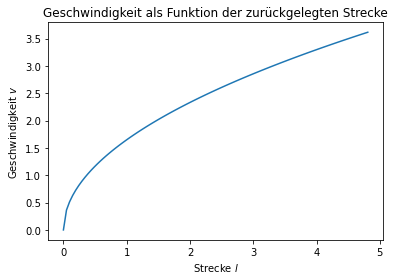

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

# Definition Konstanten 
g=9.81
m=1
R=0.1
theta=(12/180)*np.pi

lEnde=(1/np.sin((12/180)*np.pi)) # Hiehr gehe ich davon aus, dass sich die Starthöhe h0 auf die Unterkante des Zylinders bezieht. Bezieht sich die Starthöhe h0 auf den Mittelpunkt, so müsste man hier noch 1/tan(12°) abziehen. 
print(lEnde)

l=np.linspace(0,lEnde,100)
v=np.sqrt((4/3)*g*l*np.sin(theta)) # Formel für die Geschwindigkeit 

fig, ax = plt.subplots()

ax.set_title("Geschwindigkeit als Funktion der zurückgelegten Strecke")  # Titel
ax.plot(l, v )
ax.set_xlabel("Strecke $l$")
ax.set_ylabel("Geschwindigkeit $v$")

plt.show()

**b)** Plotten Sie die $y$-Komponente des Punktes $A$ gegen die Zeit $t$ im mit dem Mittelpunkt M translatierenden Koordinatensystem. Plotten Sie ebenfalls die Bahnkurve (also $x(t)$ gegen $y(t)$) des Mittelpunkts $M$ und die Bahnkurve des Punktes $A$ im ruhenden Bezugssystem. Hinweis: Die Situation hier ähnelt Übungsblattaufgabe Nr. 2.5.

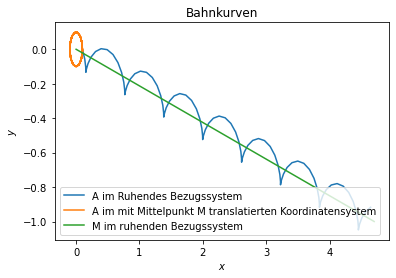

In [2]:
# Hilfe zur Berechnung von t:
t = np.zeros_like(v) # hier ist v die vorher berechnete Geschwindigkeit v
t[1:] = l[1:] / v[1:] # Berechnung der Zeit; l ist die zurückgelegte Distanz wie in der Aufgabenstellung beschrieben
# Diese Art auf arrays zuzugreifen nennt man *slicing*. 

# Berechne die Koordinaten x und y von M in Abhängigkeit von l und theta
xM=l*np.cos(theta)
yM=-l*np.sin(theta)

# Berechne die Koordinaten des Punkts A im mit dem Mittelpunkt M translatierenden Koordinatensystem abhängig von R, omega und t
omega=np.sqrt((4/3)*g*l*np.sin(theta))/R
xAM=R*np.cos(omega*t)
yAM=-R*np.sin(omega*t)
# Berechne aus den Koordinaten x und y und aus den Koordianten des Punkts A im mit dem Mittelpunkt M translatierenden Koordinatensystem
# die Koordinaten des Punkts A im ruhenden Bezugssystem (Tipp: Addition)
xAR=xM+xAM
yAR=yM+yAM

# Plotte y-Koordinate des Punkts A im mit dem Punkt M tanslatierenden Koordinatensystem 
fig, ax = plt.subplots()

ax.set_title("Bahnkurven")  # Titel
ax.plot(xAR, yAR, label='A im Ruhenden Bezugssystem' )
ax.plot(xAM, yAM, label='A im mit Mittelpunkt M translatierten Koordinatensystem')
ax.plot(xM,yM, label='M im ruhenden Bezugssystem')
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

plt.legend(loc=3)
plt.show()
# Plotte Trajektorie von Mittelpunkt M und Punkt A